In [43]:
from kipoi_cadd.data import CaddDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib

In [61]:
clinvar_cadd_v13 = "/s/project/kipoi-cadd/data/raw/v1.3/validation/clinvar_ESP/clinvar_caddv1.3.tsv.gz"
clinvar_cadd_v13_imp = "/s/project/kipoi-cadd/data/raw/v1.3/validation/clinvar_ESP/clinvar_caddv1.3.imputed.csv.gz"
training_data = "/s/project/kipoi-cadd/data/raw/v1.3/training_data/training_data.tsv"
model_file = "/tmp/gin-train/62cdc2663f484ba9a9614dcd8283aad9/model.h5"

In [66]:
sample_clinvar = pd.read_csv(clinvar_cadd_v13, sep='\t', low_memory=False)
sample_clinvar

,#Chrom,Pos,Ref,Anc,Alt,Type,Length,isTv,isDerived,AnnoType,...,Exon,Intron,oAA,nAA,Grantham,PolyPhenCat,PolyPhenVal,SIFTcat,SIFTval,RawScore
0,1,985955,G,NaN,C,SNV,0,True,NaN,CodingTranscript,...,29/36,NaN,G,R,125.0,probably_damaging,0.999,deleterious,0.00,5.708614
1,1,1167674,C,C,T,SNV,0,False,True,CodingTranscript,...,1/1,NaN,R,W,101.0,NaN,NaN,deleterious,0.03,4.482313
2,1,1167851,A,A,G,SNV,0,False,True,CodingTranscript,...,1/1,NaN,S,G,56.0,benign,0.153,deleterious,0.01,1.784550
3,1,1167858,C,C,T,SNV,0,False,True,CodingTranscript,...,1/1,NaN,P,L,98.0,possibly_damaging,0.713,deleterious,0.00,4.885392
4,1,1168124,G,G,A,SNV,0,False,True,CodingTranscript,...,1/1,NaN,D,N,23.0,probably_damaging,1.000,deleterious,0.00,4.835293
5,1,1168277,G,G,C,SNV,0,True,True,CodingTranscript,...,1/1,NaN,D,H,81.0,probably_damaging,1.000,deleterious,0.00,6.167508
6,1,1168307,G,G,A,SNV,0,False,True,CodingTranscript,...,1/1,NaN,G,S,56.0,probably_damaging,1.000,deleterious,0.00,6.788212
7,1,1168352,C,C,T,SNV,0,False,True,CodingTranscript,...,1/1,NaN,R,C,180.0,possibly_damaging,0.860,tolerated,0.09,4.718915
8,1,1168583,T,T,A,SNV,0,True,True,CodingTranscript,...,1/1,NaN,S,T,58.0,possibly_damaging,0.677,deleterious,0.01,5.311821
9,1,2160299,C,C,G,SNV,0,True,True,CodingTranscript,...,1/7,NaN,L,V,32.0,benign,0.347,deleterious,0.00,2.088096


In [65]:
clinvar_imputed = pd.read_csv(clinvar_cadd_v13_imp, low_memory=False)
print(clinvar_imputed.shape)
clinvar_imputed.head()

(15793, 904)


,0,0.1,1,0.2,0.3,0.4,1.1,0.5,0.6,0.7,...,0.801,0.802,0.803,0.804,0.805,0.806,1.15,0.807,1.16,1.17
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,1


In [70]:
sample_training = pd.read_csv(training_data, sep='\t', nrows=10000)
sample_training.columns.values

array(['y', 'Chrom', 'Pos', 'Ref', 'Alt', 'Type', 'Length', 'isTv',
       'Consequence', 'GC', 'CpG', 'mapAbility20bp', 'mapAbility35bp',
       'scoreSegDup', 'priPhCons', 'mamPhCons', 'verPhCons', 'priPhyloP',
       'mamPhyloP', 'verPhyloP', 'GerpN', 'GerpS', 'GerpRS', 'GerpRSpval',
       'bStatistic', 'mutIndex', 'dnaHelT', 'dnaMGW', 'dnaProT',
       'dnaRoll', 'mirSVR-Score', 'mirSVR-E', 'mirSVR-Aln', 'targetScan',
       'fitCons', 'cHmmTssA', 'cHmmTssAFlnk', 'cHmmTxFlnk', 'cHmmTx',
       'cHmmTxWk', 'cHmmEnhG', 'cHmmEnh', 'cHmmZnfRpts', 'cHmmHet',
       'cHmmTssBiv', 'cHmmBivFlnk', 'cHmmEnhBiv', 'cHmmReprPC',
       'cHmmReprPCWk', 'cHmmQuies', 'EncExp', 'EncH3K27Ac', 'EncH3K4Me1',
       'EncH3K4Me3', 'EncNucleo', 'EncOCC', 'EncOCCombPVal',
       'EncOCDNasePVal', 'EncOCFairePVal', 'EncOCpolIIPVal',
       'EncOCctcfPVal', 'EncOCmycPVal', 'EncOCDNaseSig', 'EncOCFaireSig',
       'EncOCpolIISig', 'EncOCctcfSig', 'EncOCmycSig', 'Segway',
       'tOverlapMotifs', 'motifDist'

In [60]:
msk = np.isin(sample_training.columns.values, sample_clinvar.columns.values)
print(sample_training.columns.values[~msk])
# ['mirSVR-Score.na', 'targetScan.na', 'cDNApos.na', 'CDSpos.na', 'protPos.na', 'Grantham.na', 'PolyPhenVal.na', 'SIFTval.na']
nad = []
for c in sample_training.columns.values:
    if ".na" in c:
        nad.append(c.split(".na")[0])
np.isin(nad, sample_clinvar.columns.values)

['y' 'Chrom' 'DAF' 'mirSVR-Score.na' 'targetScan.na' 'cDNApos.na'
 'CDSpos.na' 'protPos.na' 'Grantham.na' 'PolyPhenVal.na' 'SIFTval.na']


array([ True,  True,  True,  True,  True,  True,  True,  True])

In [72]:
msk2 = np.isin(sample_clinvar.columns.values, sample_training.columns.values)
print(sample_clinvar.columns.values[~msk2])

['#Chrom' 'Anc' 'isDerived' 'AnnoType' 'ConsScore' 'ConsDetail'
 'motifEName' 'isKnownVariant' 'ESP_AF' 'ESP_AFR' 'ESP_EUR' 'TG_AF'
 'TG_ASN' 'TG_AMR' 'TG_AFR' 'TG_EUR' 'GeneID' 'FeatureID' 'CCDS'
 'GeneName' 'Exon' 'Intron' 'RawScore']


In [69]:
sample_clinvar.columns.values

array(['#Chrom', 'Pos', 'Ref', 'Anc', 'Alt', 'Type', 'Length', 'isTv',
       'isDerived', 'AnnoType', 'Consequence', 'ConsScore', 'ConsDetail',
       'GC', 'CpG', 'mapAbility20bp', 'mapAbility35bp', 'scoreSegDup',
       'priPhCons', 'mamPhCons', 'verPhCons', 'priPhyloP', 'mamPhyloP',
       'verPhyloP', 'GerpN', 'GerpS', 'GerpRS', 'GerpRSpval',
       'bStatistic', 'mutIndex', 'dnaHelT', 'dnaMGW', 'dnaProT',
       'dnaRoll', 'mirSVR-Score', 'mirSVR-E', 'mirSVR-Aln', 'targetScan',
       'fitCons', 'cHmmTssA', 'cHmmTssAFlnk', 'cHmmTxFlnk', 'cHmmTx',
       'cHmmTxWk', 'cHmmEnhG', 'cHmmEnh', 'cHmmZnfRpts', 'cHmmHet',
       'cHmmTssBiv', 'cHmmBivFlnk', 'cHmmEnhBiv', 'cHmmReprPC',
       'cHmmReprPCWk', 'cHmmQuies', 'EncExp', 'EncH3K27Ac', 'EncH3K4Me1',
       'EncH3K4Me3', 'EncNucleo', 'EncOCC', 'EncOCCombPVal',
       'EncOCDNasePVal', 'EncOCFairePVal', 'EncOCpolIIPVal',
       'EncOCctcfPVal', 'EncOCmycPVal', 'EncOCDNaseSig', 'EncOCFaireSig',
       'EncOCpolIISig', 'EncOCctcfSig',

In [ ]:
sample_clinvar.loc[:,['PolyPhenCat','SIFTcat', 'SIFTval']]

## Stop here :/
We hit a temporary wall here, since columns from training and validation (clinvar) don't match. We don't know exactly which algorithm was used for imputation and the column of targets `y` seems to be missing or it's not clear which one it is.

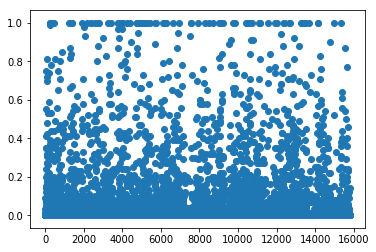

In [48]:
plt.scatter(range(sample_clinvar.shape[0]), sample_clinvar.SIFTval);
plt.show()

In [15]:
desc = sample_clinvar.describe(include='all')

In [ ]:
desc.loc[:, desc.loc['max'] == 1].columns.values

In [ ]:
clf = joblib.load(model_file)
ds = CaddDataset(lmdb_dir, shuff_10k_file)
X, y = ds.load_all(shuffle=False)